### Data
##### Source
Sloan Digital Sky Survey DR14: Classification of Stars, Galaxies and Quasar: <br>
https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey

##### Description
10,000 observations of space taken by the Sloan Digital Sky Survey (SDSS). Data set includes 17 feature columns and 1 class column.  Class column (label) identifies whether object observed is a galaxy, quasar or star. 

##### Variables/Columns
 objid = Object Identifier (PhotoObj table) [unique-drop]<br>
 ra = Right Ascension (PhotoObj table) [numerical]<br>
 dec = Declination (PhotoObj table) [numerical]<br>
 u, g, r, i, z = 5 bands of the telescope (per the Gunn-Thuan griz astronomical magnitude system) [numerical]<br>
 run = Run Number identifies the specific scan [categorical-23]<br>
 rerun = specifies how image was processed [unique-drop]<br>
 camcol = Camera Column (1 - 6) identifies scanline w/in the Run [categorical-6]<br>
 field = Field Number ~ starts at 11 (after an init'l rampup time) & can be as large as 800 for longer runs [categorical-703]<br>
 specobjid = Object Identifier [categorical-6349]<br>
 class = Object Class [Classification Labels/categorical-3]<br>
 redshift = Final Redshift [categorical-9637]<br>
 plate = Round AL plates at positions of objects of interest through which holes are drilled to  pass optical fiber [categorical-487]<br>
 mjd = Modified Julian Date (of Observation) [categorical-355]<br>
 fiberid = Optical Fiber ID  [categorical-892]

### Load CSV Data/Dependencies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')
from sklearn import tree
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost
from ipywidgets import *
from sklearn.svm import SVC

In [2]:
obsrv = pd.read_csv('./data/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

### Review/Clean Data 
re: obsv_model_InitDataAnalysis.ipynb for initial data review.

In [3]:
df1 = pd.DataFrame(obsrv, columns=['ra','dec','u','g','r','i','z','class', 'redshift'])

### Train_Test_Split

In [4]:
target = df1['class']
target_names = ['GALAXY','QSO','STAR']

In [5]:
data = df1.drop("class", axis=1)
feature_names = data.columns

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target,test_size=.3)
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(7000, 8) (7000,) (3000, 8) (3000,)


#### Decision Tree

In [7]:
# SVM linear classifier
dt_model = tree.DecisionTreeClassifier()
dt_model = dt_model.fit(X_train, y_train)
dtf_score = dt_model.score(X_test, y_test)
print("Decision Tree Classifier Score: %.2f%%" % (dtf_score*100))

Decision Tree Classifier Score: 98.37%


In [8]:
# summarize feature importance
dt_import = dt_model.feature_importances_
for dt_feature in dt_import:
    print("DT Feature: %.4f%%" % (dt_feature*100))

DT Feature: 0.0489%
DT Feature: 0.3317%
DT Feature: 0.6230%
DT Feature: 0.3362%
DT Feature: 0.3053%
DT Feature: 0.4561%
DT Feature: 0.2687%
DT Feature: 97.6302%


In [9]:
dt_zip = sorted(zip(dt_import, feature_names), reverse=True)
dt_zip

[(0.9763016075883746, 'redshift'),
 (0.006230183234967823, 'u'),
 (0.004560942358275061, 'i'),
 (0.0033616871920956535, 'g'),
 (0.0033167028564103146, 'dec'),
 (0.0030533590001843467, 'r'),
 (0.0026865680490864804, 'z'),
 (0.0004889497206055481, 'ra')]

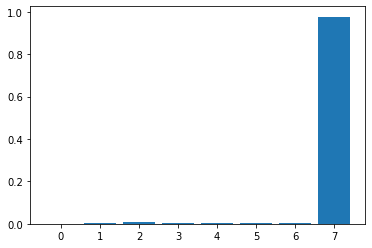

In [10]:
# plot feature importance
plt.bar([x for x in range(len(dt_import))], dt_import)
plt.show()

Redshift is the most significant feature.

#### Random Forest

In [11]:
rfc_model = RandomForestClassifier(n_estimators=500, max_depth=3)
rfc_model = rfc_model.fit(X_train, y_train)
rfc_score = rfc_model.score(X_test, y_test)
print("Random Forest Classifier Score: %.2f%%" % (rfc_score*100))

Random Forest Classifier Score: 97.40%


In [12]:
# summarize feature importance
rfc_import = rfc_model.feature_importances_
for x in rfc_import:
    print("Feature: %.3f%%" % (x*100))

Feature: 0.296%
Feature: 0.247%
Feature: 6.000%
Feature: 7.940%
Feature: 7.626%
Feature: 10.464%
Feature: 9.460%
Feature: 57.966%


In [13]:
rfc_zip = sorted(zip(rfc_import, feature_names), reverse=True)
rfc_zip

[(0.5796646651751661, 'redshift'),
 (0.10464231574708284, 'i'),
 (0.09460191680504973, 'z'),
 (0.07939740821655393, 'g'),
 (0.07626336616063682, 'r'),
 (0.06000176499863347, 'u'),
 (0.002961209100139174, 'ra'),
 (0.0024673537967379185, 'dec')]

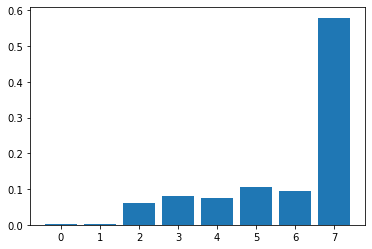

In [14]:
# plot feature importance
plt.bar([x for x in range(len(rfc_import))], rfc_import)
plt.show()

Redshift is the most significant feature.

#### Logistic Regression

In [15]:
lr_model = LogisticRegression(max_iter=3000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [16]:
y_pred = lr_model.predict(X_test)

In [17]:
lr_metric = metrics.accuracy_score(y_test, y_pred)
print("LR Metric Test/Pred Score: %.2f%%" % (lr_metric*100))

LR Metric Test/Pred Score: 95.60%


#### KNN Model

In [20]:
k_range = range(1, 27)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    k_scores.append(metrics.accuracy_score(y_test, y_pred))

print(k_scores)

# for x in range(len(k_scores)): 
#     print(f"Score: {k_scores[x]:.3f}")

[0.756, 0.7323333333333333, 0.758, 0.7483333333333333, 0.7593333333333333, 0.755, 0.7576666666666667, 0.75, 0.7493333333333333, 0.749, 0.745, 0.741, 0.7406666666666667, 0.7413333333333333, 0.7393333333333333, 0.7363333333333333, 0.7333333333333333, 0.7353333333333333, 0.7306666666666667, 0.7313333333333333, 0.7256666666666667, 0.7286666666666667, 0.724, 0.7246666666666667, 0.7176666666666667, 0.716]


Text(0, 0.5, 'Testing Accuracy')

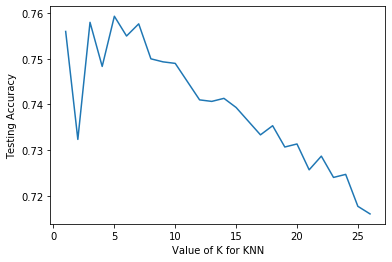

In [21]:
df1_plot = plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Unscaled, k-1 produced the highest test accuracy at 76.97%

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
kn1_metric = metrics.accuracy_score(y_test, y_pred)

print("KNN Metric Test/Pred (k-1) Score: %.2f%%" % (kn1_metric*100))

KNN Metric Test/Pred (k-1) Score: 75.77%


##### Preprocessing
Standard Scaler

In [22]:
X_scaler = StandardScaler().fit(X_train)

In [23]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.915
k: 3, Train/Test Score: 0.953/0.910
k: 5, Train/Test Score: 0.937/0.902
k: 7, Train/Test Score: 0.926/0.891
k: 9, Train/Test Score: 0.915/0.889
k: 11, Train/Test Score: 0.906/0.887
k: 13, Train/Test Score: 0.904/0.885
k: 15, Train/Test Score: 0.898/0.874
k: 17, Train/Test Score: 0.894/0.874
k: 19, Train/Test Score: 0.890/0.873


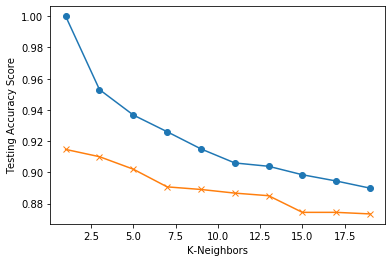

In [24]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("K-Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

#### SVC Model

In [25]:
# Support vector machine linear classifier
svc_model = SVC(kernel='poly', C=2.2, degree=10)
svc_model.fit(X_train, y_train)

SVC(C=2.2, degree=10, kernel='poly')

In [26]:
# Model Accuracy
svc_metric = svc_model.score(X_test, y_test)
print("SVC Test Accuracy: %.2f%%" % (svc_metric*100))

SVC Test Accuracy: 71.27%


In [27]:
# Calculate classification report
predictions = svc_model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

      GALAXY       0.64      0.96      0.77      1486
         QSO       0.98      0.59      0.73       261
        STAR       0.91      0.44      0.60      1253

    accuracy                           0.71      3000
   macro avg       0.84      0.66      0.70      3000
weighted avg       0.78      0.71      0.69      3000



#### XGBoost

##### Preprocessing
Update Class Column from STRING to INT

In [28]:
df_encoded = pd.DataFrame(obsrv, columns=['ra','dec','u','g','r','i','z','class', 'redshift'])

In [29]:
le = LabelEncoder()
df_encoded['class'] = le.fit_transform(df_encoded['class'])
df_encoded.head()

,ra,dec,u,g,r,i,z,class,redshift
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,2,-0.000009
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,2,-0.000055
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0,0.123111
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,2,-0.000111
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,2,0.000590


In [30]:
# Assign Variables
X = df_encoded.drop(['class'], axis=1)
Y = df_encoded['class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3)
# print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

In [32]:
# Create / Train the Model 
xgb_model = xgboost.XGBClassifier(max_depth=3, learning_rate=.7)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
# Make Predictions
y_pred = xgb_model.predict(X_test)
xgb_predictions = [round(value) for value in y_pred]

In [34]:
# Evaluation
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Test Accuracy: %.2f%%" % (xgb_accuracy * 100.0))

XGBoost Test Accuracy: 99.17%


## Summary of ML Model Results

In [39]:
print("Decision Tree Classifier Score: %.2f%%" % (dtf_score*100))
print("Random Forest Classifier Score: %.2f%%" % (rfc_score*100))
print("Linear Regression Test/Pred Score: %.2f%%" % (lr_metric*100))
print("KNN Test/Pred (k-1) Score: %.2f%%" % (kn1_metric*100))
print("SVC Test Accuracy: %.2f%%" % (svc_metric*100))
print("XGBoost Test Accuracy: %.2f%%" % (xgb_accuracy*100.0))

Decision Tree Classifier Score: 98.37%
Random Forest Classifier Score: 97.40%
Linear Regression Test/Pred Score: 95.60%
KNN Test/Pred (k-1) Score: 75.77%
SVC Test Accuracy: 71.27%
XGBoost Test Accuracy: 99.17%
